In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
# Set the seed for reproducibility
np.random.seed(24)

In [3]:
# Data Loading and Exploration
metadata_df = pd.read_csv('data/heart_cleveland_upload.csv')
metadata_df.shape

(297, 14)

In [4]:
metadata_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
metadata_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


<Axes: >

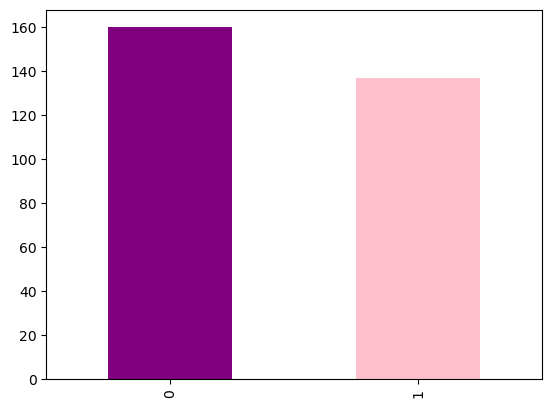

In [6]:
metadata_df['condition'].value_counts().plot(kind="bar", color=["purple", "pink"])

In [7]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [8]:
metadata_df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [9]:
metadata_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


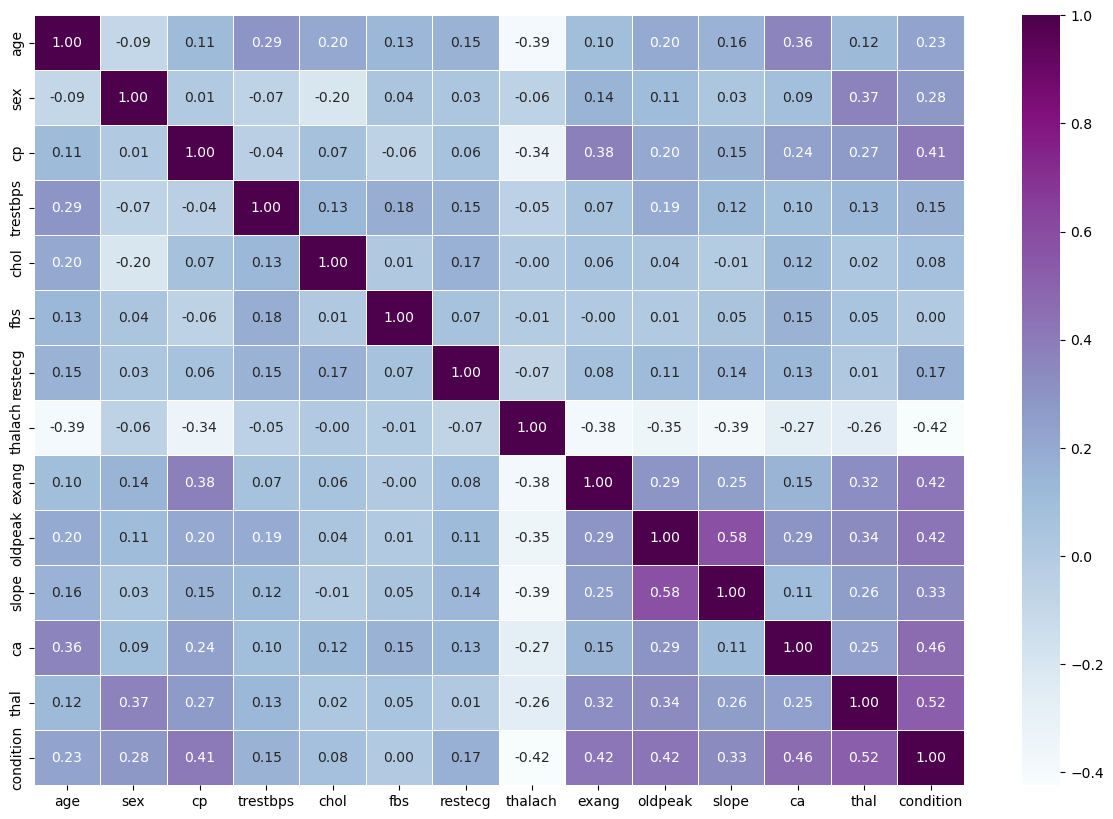

In [10]:
correlation_matrix = metadata_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(correlation_matrix, 
                 annot=True, 
                 linewidth=0.5, 
                 fmt=".2f", 
                 cmap="BuPu")

In [11]:
# Data Preprocessing and Splitting
X = metadata_df.drop("condition", axis=1)
y = metadata_df["condition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# Model Definition and Training
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [13]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [14]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores


/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.85, 'KNN': 0.75, 'Random Forest': 0.8666666666666667}

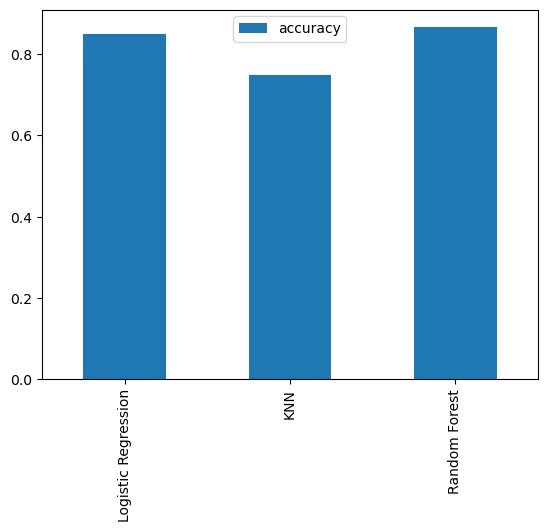

In [15]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [16]:
# KNN Model Evaluation
train_scores = []
test_scores = []

neighbors = range(1, 21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.00%


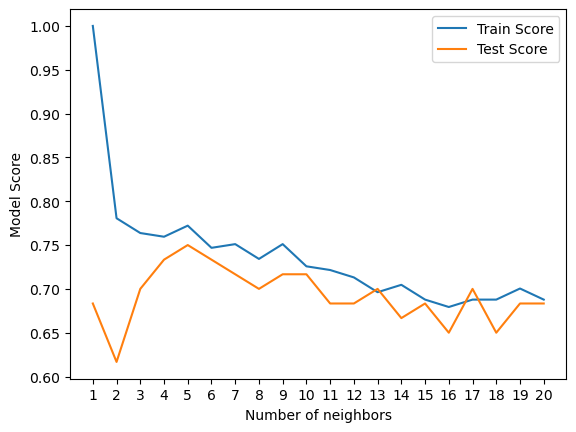

In [17]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%")

In [18]:
# Hyperparameter Tuning - Logistic Regression and Random Forest
log_reg_grid = {"C": np.logspace(-4, 4, 30), "solver": ["liblinear"]}
random_rf_grid = {"n_estimators": np.arange(10, 1000, 50), "max_depth": [None, 3, 5, 10],
                  "min_samples_split": np.arange(2, 20, 2), "min_samples_leaf": np.arange(1, 20, 2)}

In [19]:
# Randomized Search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [20]:
rs_log_reg.best_estimator_

LogisticRegression(C=4.893900918477489, solver='liblinear')

In [21]:
rs_log_reg.score(X_test, y_test)

0.85

In [22]:
# Randomized Search for Random Forest
np.random.seed(24)
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=random_rf_grid, 
                           cv=5, 
                           n_iter=20, 
                           verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [23]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [24]:
rs_rf.score(X_test, y_test)

0.9

In [25]:
# Grid Search for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 30), "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [26]:
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [27]:
gs_log_reg.score(X_test, y_test)

0.85

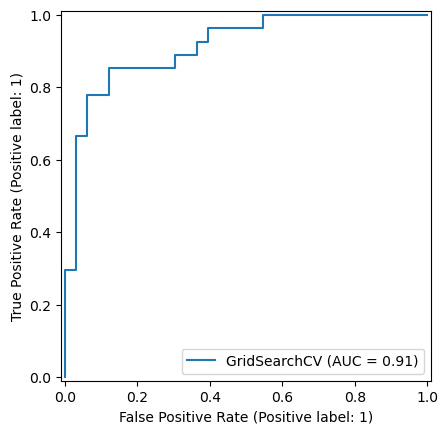

In [28]:
# Model Evaluation and Visualization
y_preds = gs_log_reg.predict(X_test)
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

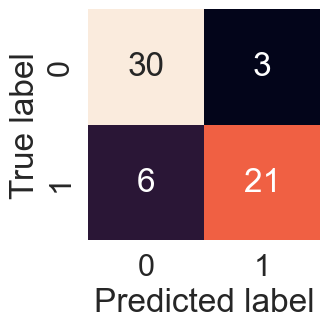

In [29]:
sns.set(font_scale=2)
def plot_conf_mat(y_test, y_preds):

    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False)
    plt.xlabel("Predicted label") 
    plt.ylabel("True label") 
    
plot_conf_mat(y_test, y_preds)

In [30]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.88      0.78      0.82        27

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.85        60
weighted avg       0.85      0.85      0.85        60



In [31]:
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [32]:
# Cross-validated Metrics
clf = LogisticRegression(C=.1082636733874054, solver="liblinear")

In [33]:
cv_acc = np.mean(cross_val_score(clf, X, y, cv=5, scoring="accuracy"))
cv_acc

0.8420903954802259

In [34]:
cv_pre = np.mean(cross_val_score(clf, X, y, cv=5, scoring="precision"))
cv_pre

0.8918514588859416

In [35]:
cv_re = np.mean(cross_val_score(clf, X, y, cv=5, scoring="recall"))
cv_re

0.7690476190476191

In [36]:
cv_f1 = np.mean(cross_val_score(clf, X, y, cv=5, scoring="f1"))
cv_f1

0.7986451979004114

<Axes: title={'center': 'Cross-validated Classification metrics'}>

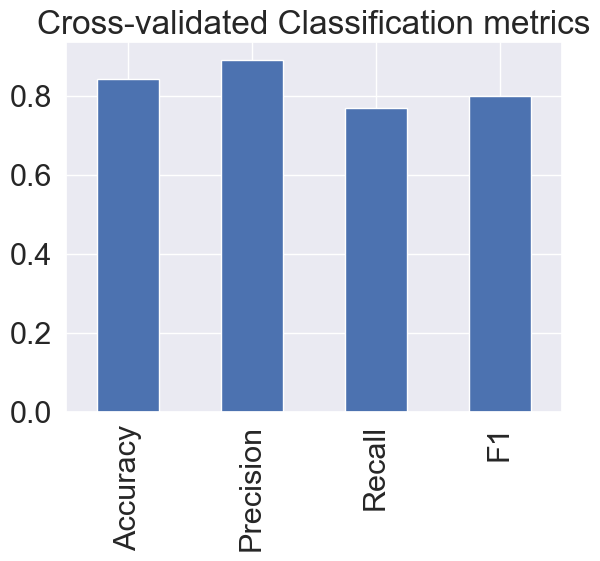

In [37]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc, "Precision": cv_pre, "Recall": cv_re, "F1": cv_f1}, index=[0])
cv_metrics.T.plot.bar(title="Cross-validated Classification metrics", legend=False)

In [38]:
# Model Training and Saving
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [39]:
clf.coef_

array([[-0.02961725,  0.51995574,  0.3951231 ,  0.0180454 ,  0.00597259,
        -0.40406694,  0.23577715, -0.0360413 ,  0.39668286,  0.29251894,
         0.14627283,  0.85889528,  0.77058543]])

In [40]:
# Feature Importance Visualization
feature_dict = dict(zip(metadata_df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.02961725403189042,
 'sex': 0.519955741674986,
 'cp': 0.39512310310184295,
 'trestbps': 0.018045402095715226,
 'chol': 0.005972587872960319,
 'fbs': -0.40406693809872174,
 'restecg': 0.23577715225652632,
 'thalach': -0.03604129920739439,
 'exang': 0.3966828625344778,
 'oldpeak': 0.29251894335120066,
 'slope': 0.14627283382617817,
 'ca': 0.8588952844968419,
 'thal': 0.770585426093878}

<Axes: title={'center': 'Feature Importance'}>

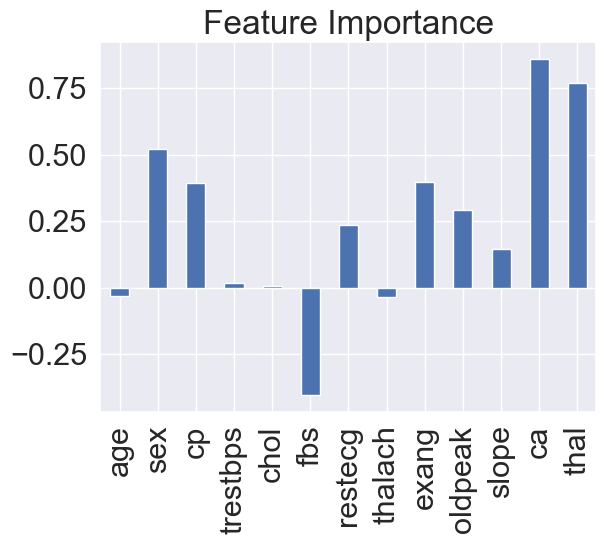

In [41]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [43]:
from joblib import dump

# Save the model
dump(gs_log_reg, "models/heart.joblib")


['heart.joblib']

### References

[Original Kernel](https://www.kaggle.com/code/nikunjmahida/heart-disease-prediction)